In [1]:
%pip uninstall -y todd_ai
%pip install --no-build-isolation --extra-index-url https://pypi.org/simple .. > /dev/null

Found existing installation: todd-ai 0.4.0
Uninstalling todd-ai-0.4.0:
  Successfully uninstalled todd-ai-0.4.0
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import tempfile

import cv2
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import requests
import torch

import todd

[2024-05-01 22:58:40,790 29157:140704673377920][patches.py:9 todd <module>] INFO: `ipdb` is installed. Using it for debugging.
/Users/bytedance/.local/share/virtualenvs/todd-ARrcnwyq/lib/python3.11/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [3]:
filename = "val2017/000000000139.jpg"
try:
    response = requests.get("http://images.cocodataset.org/" + filename)
    assert response.status_code == 200
    image: npt.NDArray[np.uint8] = np.frombuffer(response.content, dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_ANYCOLOR)
except Exception:
    image = cv2.imread(os.path.expanduser("~/Developer/data/coco/") + filename)
h, w, c = image.shape
assert c == 3

In [4]:
def imshow(image: npt.NDArray[np.uint8]) -> None:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()


def activation(visual: todd.visuals.BaseVisual) -> None:
    activation = torch.rand(h // 16, w // 16)
    visual.image(image)
    visual.activation(activation, width=w, height=h, opacity=0.3)


def annotations(visual: todd.visuals.BaseVisual) -> None:
    annotations = [
        dict(bbox=[236.98, 142.51, 24.7, 69.5], category_id=64),
        dict(bbox=[7.03, 167.76, 149.32, 94.87], category_id=72),
    ]
    categories = {64: "potted plant", 72: "tv"}
    visual.image(image)
    for annotation in annotations:
        category_id = annotation["category_id"]
        category_name = categories[category_id]
        visual.annotation(
            category_name,
            *map(int, annotation["bbox"]),
            visual.color(category_id),
        )

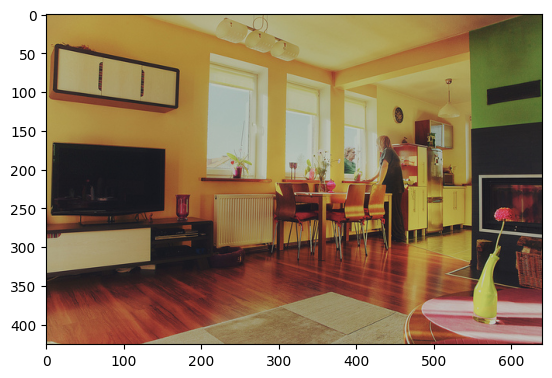

In [5]:
imshow(image)

In [6]:
with tempfile.TemporaryFile(suffix=".pptx") as f:
    visual = todd.visuals.PPTXVisual(w, h)
    activation(visual)
    visual.save(f)

In [7]:
with tempfile.TemporaryFile(suffix=".pptx") as f:
    visual = todd.visuals.PPTXVisual(w, h)
    annotations(visual)
    visual.save(f)

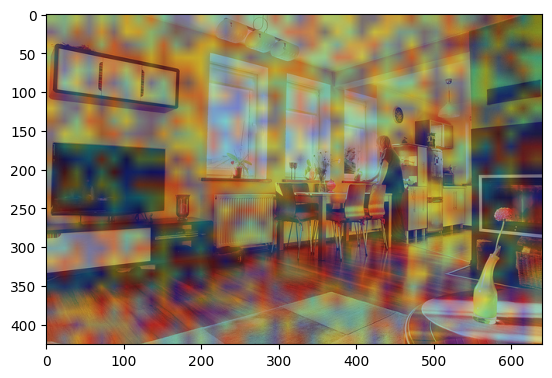

In [8]:
with tempfile.NamedTemporaryFile(suffix=".png") as f:
    visual = todd.visuals.CV2Visual(w, h)
    activation(visual)
    visual.save(f.name)
    imshow(cv2.imread(f.name))

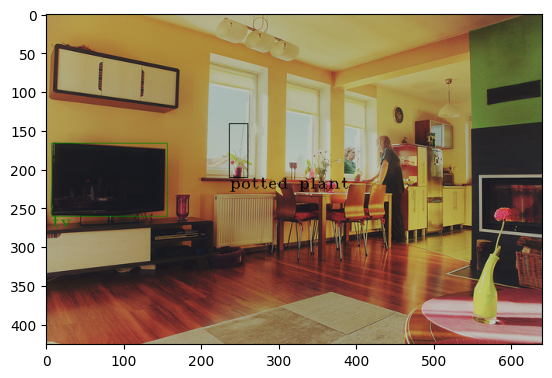

In [9]:
with tempfile.NamedTemporaryFile(suffix=".png") as f:
    visual = todd.visuals.CV2Visual(w, h)
    annotations(visual)
    visual.save(f.name)
    imshow(cv2.imread(f.name))